In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.unit as u
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet, CharmmPsfFile
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

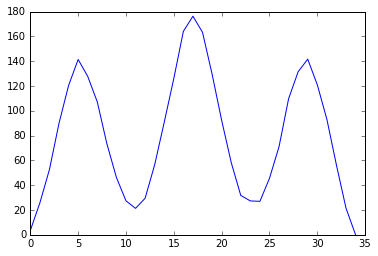

In [2]:
param = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf',
                           '../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = '../torsion_scans/DFT_b3lyp/butane_scan_b3lyp_360.log'

butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

plt.plot(butane_scan.mm_energy)

In [3]:
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}


In [4]:
nb = forces['NonbondedForce']
for i in range(nb.getNumParticles()):
    print nb.getParticleParameters(i)

[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.100416, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.100416, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.100416, unit=kilojoule/mole)]
[Quantity(value=-0.27, unit=elementary charge), Quantity(value=0.3652684744375391, unit=nanometer), Quantity(value=0.32635200000000003, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.14644000000000001, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.14644000000000001, unit=kilojoule/mole)]
[Quantity(value=-0.18, unit=elementary charge), Quantity(value=0.35814128469241635, u

In [5]:
bond = forces['HarmonicBondForce']
for i in range(bond.getNumBonds()):
    print bond.getBondParameters(i)

[0, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[0, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[0, 1, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[1, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[1, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[2, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[3, 9, Quantity(value=0.2561, unit=nanometer), Quantity(value=6694.400000000001, unit=kilojoule/(nanometer**2*mole))]
[3, 5, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2

In [6]:
angle = forces['HarmonicAngleForce']
for i in range(angle.getNumAngles()):
    print angle.getAngleParameters(i)

[0, 3, 6, Quantity(value=1.9216075064457567, unit=radian), Quantity(value=289.5328, unit=kilojoule/(mole*radian**2))]
[0, 3, 2, Quantity(value=1.8919369091618534, unit=radian), Quantity(value=297.064, unit=kilojoule/(mole*radian**2))]
[0, 3, 1, Quantity(value=1.8919369091618534, unit=radian), Quantity(value=297.064, unit=kilojoule/(mole*radian**2))]
[1, 3, 6, Quantity(value=1.9216075064457567, unit=radian), Quantity(value=289.5328, unit=kilojoule/(mole*radian**2))]
[1, 3, 2, Quantity(value=1.8919369091618534, unit=radian), Quantity(value=297.064, unit=kilojoule/(mole*radian**2))]
[2, 3, 6, Quantity(value=1.9216075064457567, unit=radian), Quantity(value=289.5328, unit=kilojoule/(mole*radian**2))]
[3, 6, 9, Quantity(value=2.007128639793479, unit=radian), Quantity(value=485.344, unit=kilojoule/(mole*radian**2))]
[3, 6, 5, Quantity(value=1.9216075064457567, unit=radian), Quantity(value=289.5328, unit=kilojoule/(mole*radian**2))]
[3, 6, 4, Quantity(value=1.9216075064457567, unit=radian), Qu

In [7]:
dihedrals = forces['PeriodicTorsionForce']
for i in range(dihedrals.getNumTorsions()):
    print dihedrals.getTorsionParameters(i)

[0, 3, 6, 4, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[0, 3, 6, 5, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[0, 3, 6, 9, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[1, 3, 6, 4, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[1, 3, 6, 5, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[1, 3, 6, 9, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[2, 3, 6, 4, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[2, 3, 6, 5, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[2, 3, 6, 9, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.66944, unit=kilojoule/mole)]
[3, 6, 9, 7, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.75312, unit=kilojoule/mole)]
[3, 6, 9, 8, 3, Quantity(value=0.0, unit

In [8]:
# Set all Torsion K's to 0

param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0

In [9]:
# reparameterize molecule and check if Torsions are off
butane_scan.compute_energy(param)
dihedrals = forces['PeriodicTorsionForce']
for i in range(dihedrals.getNumTorsions()):
    print dihedrals.getTorsionParameters(i)

[0, 3, 6, 4, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[0, 3, 6, 5, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[0, 3, 6, 9, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 3, 6, 4, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 3, 6, 5, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 3, 6, 9, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 3, 6, 4, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 3, 6, 5, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 3, 6, 9, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[3, 6, 9, 7, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kilojoule/mole)]
[3, 6, 9, 8, 3, Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=kiloj

In [10]:
# Turn all bonds off and check

param.bond_types[('CG331', 'CG321')].k=0
param.bond_types[('CG321', 'CG321')].k=0
param.bond_types[('CG331', 'HGA3')].k=0
param.bond_types[('CG321', 'HGA2')].k=0

butane_scan.compute_energy(param)
bond = forces['HarmonicBondForce']
for i in range(bond.getNumBonds()):
    print bond.getBondParameters(i)


[0, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[0, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[0, 1, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[1, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[1, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[2, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[3, 9, Quantity(value=0.2561, unit=nanometer), Quantity(value=6694.400000000001, unit=kilojoule/(nanometer**2*mole))]
[3, 5, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2

In [11]:
# Turns out we have to create a new system with these parameters?
butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)

# this creates a new system under the hood
butane_scan.create_context(param)
butane_scan.compute_energy(param)

# Now check if the bonds were turned off
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

bond = forces['HarmonicBondForce']
for i in range(bond.getNumBonds()):
    print bond.getBondParameters(i)

[0, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[0, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[0, 1, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[1, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[1, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[2, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[3, 9, Quantity(value=0.2561, unit=nanometer), Quantity(value=6694.400000000001, unit=kilojoule/(nanometer**2*mole))]
[3, 5, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2

In [12]:
# Do I need a total new structure?

butane_scan.structure = CharmmPsfFile(structure)
butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)
# this creates a new system under the hood
butane_scan.create_context(param)
butane_scan.compute_energy(param)

In [13]:
# Check if bonds are off
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

bond = forces['HarmonicBondForce']
for i in range(bond.getNumBonds()):
    print bond.getBondParameters(i)


[0, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[0, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[0, 1, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[1, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[1, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=4518.72, unit=kilojoule/(nanometer**2*mole))]
[2, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2*mole))]
[3, 9, Quantity(value=0.2561, unit=nanometer), Quantity(value=6694.400000000001, unit=kilojoule/(nanometer**2*mole))]
[3, 5, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=18853.104000000003, unit=kilojoule/(nanometer**2

In [14]:
# The bonds are not turning off. What gives?
# Ahah! It's the Urey Bradley term! 
param.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)
# this creates a new system under the hood
butane_scan.create_context(param)
butane_scan.compute_energy(param)

# Check bonds

# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

bond = forces['HarmonicBondForce']
for i in range(bond.getNumBonds()):
    print bond.getBondParameters(i)


[0, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[0, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[0, 1, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[1, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[1, 2, Quantity(value=0.18020000000000003, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[2, 6, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[3, 9, Quantity(value=0.2561, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[3, 5, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=0.0, unit=kilojoule/(nanometer**2*mole))]
[3, 4, Quantity(value=0.21789999999999998, unit=nanometer), Quantity(value=0.

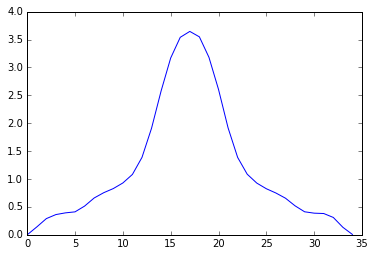

In [15]:
#butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)
plt.plot(butane_scan.mm_energy)
#plt.plot(butane_scan.delta_energy)

In [16]:
# Now let's figure out the non-bonded

nb = forces['NonbondedForce']

for i in range(nb.getNumParticles()):
    print nb.getParticleParameters(i)

[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.100416, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.100416, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.100416, unit=kilojoule/mole)]
[Quantity(value=-0.27, unit=elementary charge), Quantity(value=0.3652684744375391, unit=nanometer), Quantity(value=0.32635200000000003, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.14644000000000001, unit=kilojoule/mole)]
[Quantity(value=0.09, unit=elementary charge), Quantity(value=0.23876085646161097, unit=nanometer), Quantity(value=0.14644000000000001, unit=kilojoule/mole)]
[Quantity(value=-0.18, unit=elementary charge), Quantity(value=0.35814128469241635, u

In [50]:
# Turn off all LJ and reparameterize

param.atom_types['CG331'].sigma_14 = 1.0
param.atom_types['CG331'].rmin = 1.0
param.atom_types['CG331'].rmin_14 = 1.0
param.atom_types['CG331'].epsilon_14 = 0
param.atom_types['CG331'].sigma=1.0
param.atom_types['CG331'].epsilon = 0.0
param.atom_types['CG321'].epsilon_14 = 0.0
param.atom_types['CG321'].rmin_14 = 1.0
param.atom_types['CG321'].sigma_14 = 1.0
param.atom_types['CG321'].sigma=1.0
param.atom_types['CG321'].epsilon = 0.0
param.atom_types['HGA3'].epsilon_14 = 0.0
param.atom_types['HGA3'].sigma = 1.0
param.atom_types['HGA3'].epsilon = 0.0
param.atom_types['HGA2'].epsilon_14 = 0.0
param.atom_types['HGA2'].sigma = 1.0
param.atom_types['HGA2'].epsilon = 0.0

butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)
butane_scan.create_context(param)
butane_scan.compute_energy(param)

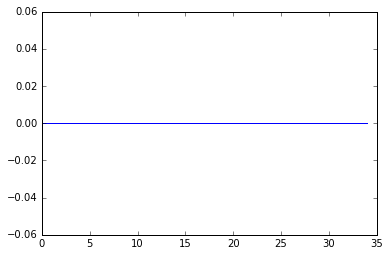

In [51]:
plt.plot(butane_scan.mm_energy)

In [41]:
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

nb = forces['NonbondedForce']

for i in range(nb.getNumParticles()):
    print nb.getParticleParameters(i)

[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]


In [42]:
# Now turn charges off. This will have to happen in the structure

for atom in butane_scan.structure.atoms:
    atom.charge = 0

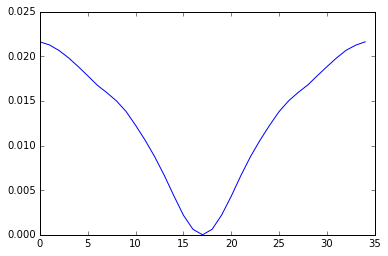

In [43]:
# Create new system with this structure
butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)
butane_scan.create_context(param)
butane_scan.compute_energy(param)

plt.plot(butane_scan.mm_energy)

In [44]:
# Check what's still on (is it the exceptions?)
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

nb = forces['NonbondedForce']

for i in range(nb.getNumParticles()):
    print nb.getParticleParameters(i)


[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.1, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]


In [45]:
for i in range(nb.getNumExceptions()):
    print nb.getExceptionParameters(i)

[0, 3, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 0, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 0, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[6, 0, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 3, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 1, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[6, 1, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 3, Quantity(value=0.0, unit=elementary charge**2), Quantit

In [47]:
serialized = mm.XmlSerializer.serialize(butane_scan.system)
print serialized

<?xml version="1.0" ?>
<System openmmVersion="7.0" type="System" version="1">
	<PeriodicBoxVectors>
		<A x="2" y="0" z="0"/>
		<B x="0" y="2" z="0"/>
		<C x="0" y="0" z="2"/>
	</PeriodicBoxVectors>
	<Particles>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
	</Particles>
	<Constraints/>
	<Forces>
		<Force forceGroup="0" type="HarmonicBondForce" version="1">
			<Bonds>
				<Bond d=".1111" k="0" p1="0" p2="3"/>
				<Bond d=".1111" k="0" p1="1" p2="3"/>
				<Bond d=".1111" k="0" p1="2" p2="3"/>
				<Bond d=".15280000000000002" k="0" p1="3" p2="6"/>
				<Bond d=".1111" k="0" p1="4" p2="6"/>
				<Bond d=".1111" k="0" p1="5" p2="6"/>
				<Bond d=".153000000000000

In [26]:
# So the angles were'nt off

param.angle_types[('CG331', 'CG321', 'CG321')].k  = 0
param.angle_types[('CG331', 'CG321', 'HGA2')].k = 0
param.angle_types[('CG321', 'CG321', 'HGA2')].k = 0
param.angle_types[('HGA3', 'CG331', 'CG321')].k = 0
param.angle_types[('HGA3', 'CG331', 'HGA3')].k = 0
param.angle_types[('HGA2', 'CG321', 'HGA2')].k = 0

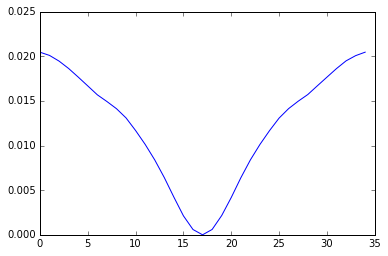

In [30]:
# Create new system with this structure
butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)
butane_scan.create_context(param)
butane_scan.compute_energy(param)

plt.plot(butane_scan.mm_energy)

In [61]:
# Print out all energy
import parmed
for i in range(butane_scan.n_frames):
    butane_scan.context.setPositions(butane_scan.positions[i])
    param_omm = parmed.openmm.load_topology(butane_scan.structure.topology, butane_scan.system, xyz=butane_scan.positions[i])
    energy = parmed.openmm.energy_decomposition_system(param_omm, butane_scan.system, nrg=u.kilojoules_per_mole)
    print energy

[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 2947218690.9923306), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 3056698547.3972096), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 3209735246.666679), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 3367611932.082147), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 3483739390.8862977), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0)

In [63]:
print serialized

<?xml version="1.0" ?>
<System openmmVersion="7.0" type="System" version="1">
	<PeriodicBoxVectors>
		<A x="2" y="0" z="0"/>
		<B x="0" y="2" z="0"/>
		<C x="0" y="0" z="2"/>
	</PeriodicBoxVectors>
	<Particles>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
	</Particles>
	<Constraints/>
	<Forces>
		<Force forceGroup="0" type="HarmonicBondForce" version="1">
			<Bonds>
				<Bond d=".1111" k="0" p1="0" p2="3"/>
				<Bond d=".1111" k="0" p1="1" p2="3"/>
				<Bond d=".1111" k="0" p1="2" p2="3"/>
				<Bond d=".15280000000000002" k="0" p1="3" p2="6"/>
				<Bond d=".1111" k="0" p1="4" p2="6"/>
				<Bond d=".1111" k="0" p1="5" p2="6"/>
				<Bond d=".153000000000000

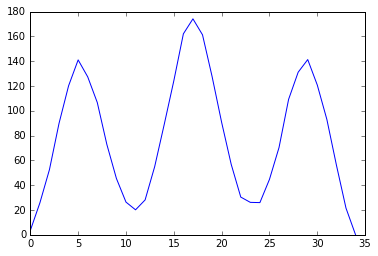

In [76]:
# Use parameter sets where sigma and epsilon are already set to 1 and 0
param = CharmmParameterSet('../param/top_all36_cgenff.rtf',
                           '../param/par_all36_cgenff.prm')
structure = '../structure/butane_charge_off.psf'
scan = '../torsion_scans/DFT_b3lyp/butane_scan_b3lyp_360.log'

butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

plt.plot(butane_scan.mm_energy)


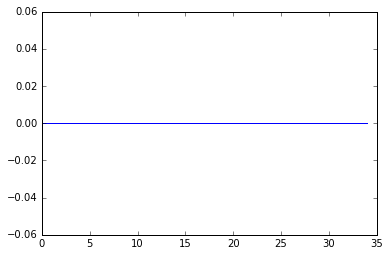

In [77]:
# Turn everything off
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param.bond_types[('CG331', 'CG321')].k=0
param.bond_types[('CG321', 'CG321')].k=0
param.bond_types[('CG331', 'HGA3')].k=0
param.bond_types[('CG321', 'HGA2')].k=0
param.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param.angle_types[('CG331', 'CG321', 'CG321')].k  = 0
param.angle_types[('CG331', 'CG321', 'HGA2')].k = 0
param.angle_types[('CG321', 'CG321', 'HGA2')].k = 0
param.angle_types[('HGA3', 'CG331', 'CG321')].k = 0
param.angle_types[('HGA3', 'CG331', 'HGA3')].k = 0
param.angle_types[('HGA2', 'CG321', 'HGA2')].k = 0

# reparameterize
butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)
butane_scan.create_context(param)
butane_scan.compute_energy(param)

plt.plot(butane_scan.mm_energy)


In [78]:
# Print out energy
# Print out all energy
import parmed
for i in range(butane_scan.n_frames):
    butane_scan.context.setPositions(butane_scan.positions[i])
    param_omm = parmed.openmm.load_topology(butane_scan.structure.topology, butane_scan.system, xyz=butane_scan.positions[i])
    energy = parmed.openmm.energy_decomposition_system(param_omm, butane_scan.system, nrg=u.kilojoules_per_mole)
    print energy

[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 0.0), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 0.0), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 0.0), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 0.0), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 0.0), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 0.0), ('NonbondedForce', 0.0), ('CMMotionRemover'

In [82]:
serialized = mm.XmlSerializer.serialize(butane_scan.system)
print serialized

<?xml version="1.0" ?>
<System openmmVersion="7.0" type="System" version="1">
	<PeriodicBoxVectors>
		<A x="2" y="0" z="0"/>
		<B x="0" y="2" z="0"/>
		<C x="0" y="0" z="2"/>
	</PeriodicBoxVectors>
	<Particles>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="1.008"/>
		<Particle mass="12.011"/>
	</Particles>
	<Constraints/>
	<Forces>
		<Force forceGroup="0" type="HarmonicBondForce" version="1">
			<Bonds>
				<Bond d=".1111" k="0" p1="0" p2="3"/>
				<Bond d=".1111" k="0" p1="1" p2="3"/>
				<Bond d=".1111" k="0" p1="2" p2="3"/>
				<Bond d=".15280000000000002" k="0" p1="3" p2="6"/>
				<Bond d=".1111" k="0" p1="4" p2="6"/>
				<Bond d=".1111" k="0" p1="5" p2="6"/>
				<Bond d=".153000000000000

In [80]:
# Check what's still on (is it the exceptions?)
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

nb = forces['NonbondedForce']

for i in range(nb.getNumParticles()):
    print nb.getParticleParameters(i)


[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.0, unit=elementary charge), Quantity(value=0.17817974362806788, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(val

In [81]:
# Check what's still on (is it the exceptions?)
# Print out all forces before I start setting things to zero
forces = {butane_scan.system.getForce(i).__class__.__name__: butane_scan.system.getForce(i) 
         for i in range(butane_scan.system.getNumForces())}

nb = forces['NonbondedForce']

for i in range(nb.getNumExceptions()):
    print nb.getExceptionParameters(i)


[0, 3, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 0, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 0, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[6, 0, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[1, 3, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 1, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[6, 1, Quantity(value=0.0, unit=elementary charge**2), Quantity(value=0.5, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[2, 3, Quantity(value=0.0, unit=elementary charge**2), Quantit

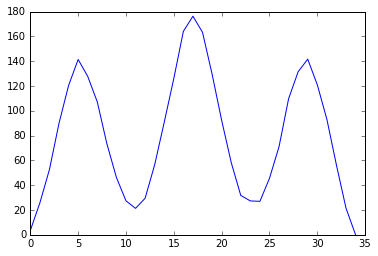

In [52]:
# What's if I change everything in the system?
param = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf',
                           '../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = '../torsion_scans/DFT_b3lyp/butane_scan_b3lyp_360.log'

butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

plt.plot(butane_scan.mm_energy)


In [58]:
for atom in butane_scan.structure.atoms:
    atom.rmin_14 = 1.0
    atom.rmin = 1.0
    atom.charge = 0.0
    atom.epsilon =0.0
    atom.epsilon_14 = 0.0
    
for bond in butane_scan.structure.bond_types:
    bond.k = 0

for angle in butane_scan.structure.angle_types:
    angle.k = 0

for ub in butane_scan.structure.urey_bradley_types:
    ub.k = 0

In [59]:
butane_scan.compute_energy(param)

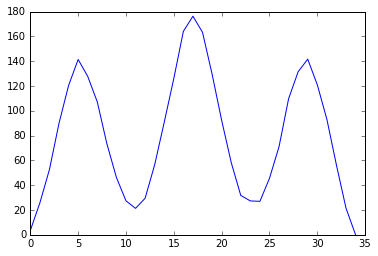

In [60]:
plt.plot(butane_scan.mm_energy)

In [5]:
# Model and sample. The code was modified to fit the difference potential. 

platform = mm.Platform.getPlatformByName('Reference')

model = Model.TorsionFitModelEliminatePhase(param, butane_scan, platform=platform,
                                            param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')])

In [6]:
model.pymc_parameters['qm_fit'].value

array([   2.6203988 ,   20.44121533,   40.8446418 ,   71.13347682,
         95.89742398,  114.5485683 ,  102.90644639,   87.39459295,
         60.38705975,   38.96151752,   23.73477735,   18.13898549,
         23.51456386,   45.0348984 ,   71.80184535,   98.92094952,
        130.2628536 ,  139.70908797,  129.45988806,  102.43336475,
         73.21513842,   46.81925035,   25.78994329,   24.05982154,
         23.34164803,   38.30387427,   57.95198657,   90.05219922,
        106.64692244,  114.82174834,   96.4593213 ,   74.29037591,
         44.46089895,   16.17832462,   -0.86388472])

In [13]:
# Turn off all parameters

param.bond_types[('CG331', 'CG321')].k=0
param.bond_types[('CG321', 'CG321')].k=0
param.bond_types[('CG331', 'HGA3')].k=0
param.bond_types[('CG321', 'HGA2')].k=0
param.angle_types[('CG331', 'CG321', 'CG321')].k=0
param.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param.angle_types[('HGA2', 'CG321', 'CG321')].k=0

for atom in butane_scan.structure.atoms:
    atom.charge = 0
    atom.sigma = 1
    atom.epsilon = 0
    param.atom_types[atom.type].charge = 0
    param.atom_types[atom.type].rmin = 1
    param.atom_types[atom.type].epsilon = 0
    param.atom_types[atom.type].sigma = 1
    print atom.sigma
    print atom.charge
    
# Create new structur with 0 charges

struct = '../structure/butane_charge_off.psf'
butane_scan.structure = CharmmPsfFile(structure)
butane_scan.integrator = mm.VerletIntegrator(0.004*u.picoseconds)

butane_scan.create_context(param)

1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
0


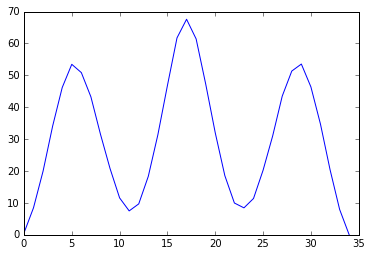

In [14]:
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)
plt.plot(butane_scan.mm_energy)
#plt.plot(butane_scan.delta_energy)

In [36]:
for i in range(nb.getNumExceptions()):
    i_atom, j_atom, chargeprod, sigma, epsilon = nb.getExceptionParameters(i)
    nb.setExceptionParameters(i, i_atom, j_atom, 0, sigma, 0) 

In [42]:
butane_scan.context.reinitialize()
nb.updateParametersInContext(butane_scan.context)

In [43]:
butane_scan.compute_energy(param)

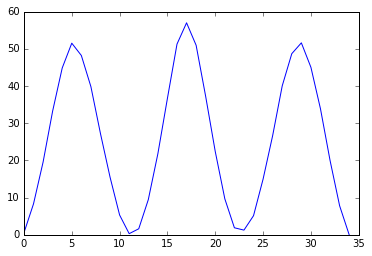

In [45]:
plt.plot(butane_scan.mm_energy)

In [19]:
import parmed

In [20]:
for i in range(butane_scan.n_frames):
    butane_scan.context.setPositions(butane_scan.positions[i])
    param_omm = parmed.openmm.load_topology(butane_scan.structure.topology, butane_scan.system, xyz=butane_scan.positions[i])
    energy = parmed.openmm.energy_decomposition_system(param_omm, butane_scan.system, nrg=u.kilojoules_per_mole)
    print energy
    

[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 4801.989132487603), ('NonbondedForce', 2947218783.1966486), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 4801.276812615605), ('NonbondedForce', 3056698639.9496694), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 4800.243965180787), ('NonbondedForce', 3209735339.808461), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 4798.967464156289), ('NonbondedForce', 3367612025.9756856), ('CMMotionRemover', 0.0)]
[('HarmonicBondForce', 0.0), ('HarmonicAngleForce', 0.0), ('PeriodicTorsionForce', 0.0), ('HarmonicBondForce', 4797.877738348711), ('NonbondedForce', 3483739485.628767), ('CMMotionRemover', 0.0)]
[('HarmonicBondFo